In [1]:
import os
import arcpy
import modelosData
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
folderArchivos = r'C:\Users\rsanchez\Downloads\Rutas_Model'

In [3]:
listaCarpetas = os.listdir(folderArchivos)
rasterRutas = []
for folder in listaCarpetas:
    rutaCarpeta = os.path.join(folderArchivos, folder)
    listadoArchivos = os.listdir(rutaCarpeta)
    for archivo in listadoArchivos:
        if archivo.endswith('.tif'):
            rasterRutas.append([os.path.join(rutaCarpeta,archivo),folder])

In [4]:
fields = ['PathCost']
listadoRutas = []
for raster in rasterRutas:
    with arcpy.da.SearchCursor(raster[0], fields) as cursor:
        for row in cursor:
            if row[0] == 0:
                pass
            else:
                listadoRutas.append(modelosData.RutasOptimasAym.almacenarRuta(costo=row[0], ruta=raster[0], rutaID=raster[1]))

data = pd.DataFrame([objeto.__dict__ for objeto in listadoRutas])
costoTotal = data.groupby('Costo').sum()

In [8]:
data['TiempoHora'] = data["Costo"] * (1/360000)
data.to_excel('Data.xlsx')
data.head(10)

,NombreRuta,Costo,RutaID,TiempoHora
0,Ruta_1,1531420.0,MArinilla_Tiempo_Seco,4.253944
1,Ruta_10,521193.0,MArinilla_Tiempo_Seco,1.447758
2,Ruta_11,2182880.0,MArinilla_Tiempo_Seco,6.063556
3,Ruta_12,2680210.0,MArinilla_Tiempo_Seco,7.445028
4,Ruta_13,2547420.0,MArinilla_Tiempo_Seco,7.076167
5,Ruta_14,2547420.0,MArinilla_Tiempo_Seco,7.076167
6,Ruta_2,971781.0,MArinilla_Tiempo_Seco,2.699392
7,Ruta_3,1094270.0,MArinilla_Tiempo_Seco,3.039639
8,Ruta_4,1085010.0,MArinilla_Tiempo_Seco,3.013917
9,Ruta_5,700677.0,MArinilla_Tiempo_Seco,1.946325


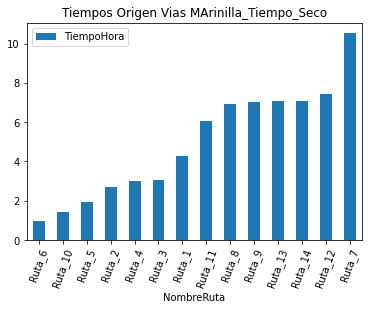

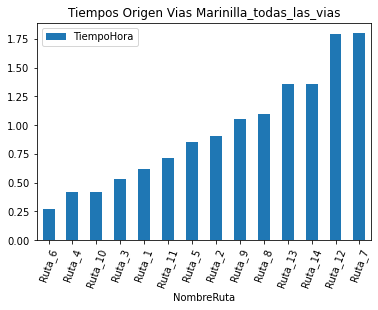

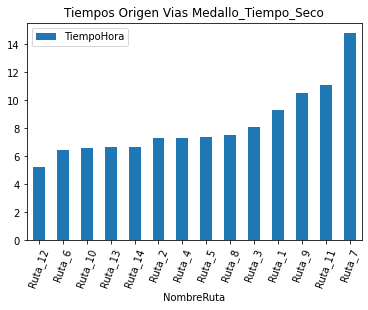

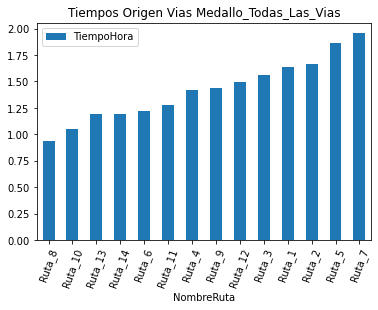

In [12]:
rutasUnicas = pd.unique(data['RutaID'])
for ruta in rutasUnicas:
    dataRuta = data[data['RutaID']==ruta]
    dataOrdenada = dataRuta.sort_values(by=['TiempoHora'])
    dataOrdenada.plot.bar(x="NombreRuta", y="TiempoHora", rot=70, title=f"Tiempos Origen Vias {ruta}")
    plot.show(block=True)